In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv("/content/MERGED FINAL.csv")

# Clean the data: replace '#NUM!' with NaN and convert all columns to numeric
df.replace("#NUM!", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Define features and target variable
X = df[['Labor force total LN',
        'Gross capital formation (% of GDP) LN',
        'IQ',
        'FD LN',
        'Economic Globalization LN']]

y = df['GDP (current US$) LN']

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Manually compute RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = (abs((y_test - y_pred_rf) / y_test)).mean() * 100

# Print performance metrics
print("Random Forest Regressor Results:")
print(f"R² Score: {r2_rf:.3f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")


Random Forest Regressor Results:
R² Score: 0.979
RMSE: 0.27
MAE: 0.18
MAPE: 0.74%


In [ ]:



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid,
                              cv=5, scoring='r2', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)  # FIXED VARIABLE NAMES

# Best Random Forest model
best_rf = rf_grid_search.best_estimator_

# Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid,
                              cv=5, scoring='r2', n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train, y_train)  # FIXED VARIABLE NAMES

# Best Gradient Boosting model
best_gb = gb_grid_search.best_estimator_

# Predict using the best models
y_pred_best_rf = best_rf.predict(X_test)  # FIXED VARIABLE NAMES
y_pred_best_gb = best_gb.predict(X_test)  # FIXED VARIABLE NAMES

# Compute performance metrics for tuned Random Forest
r2_best_rf = r2_score(y_test, y_pred_best_rf)  # FIXED VARIABLE NAMES
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf) ** 0.5
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = (abs((y_test - y_pred_best_rf) / y_test)).mean() * 100

# Compute performance metrics for tuned Gradient Boosting
r2_best_gb = r2_score(y_test, y_pred_best_gb)  # FIXED VARIABLE NAMES
rmse_best_gb = mean_squared_error(y_test, y_pred_best_gb) ** 0.5
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mape_best_gb = (abs((y_test - y_pred_best_gb) / y_test)).mean() * 100

# Return results
results = {
    "Best Random Forest": {"R2": r2_best_rf, "RMSE": rmse_best_rf, "MAE": mae_best_rf, "MAPE": mape_best_rf},
    "Best Gradient Boosting": {"R2": r2_best_gb, "RMSE": rmse_best_gb, "MAE": mae_best_gb, "MAPE": mape_best_gb},
}

# Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Random Forest Results:
R2: 0.979
RMSE: 0.273
MAE: 0.183
MAPE: 0.730

Best Gradient Boosting Results:
R2: 0.976
RMSE: 0.288
MAE: 0.190
MAPE: 0.753


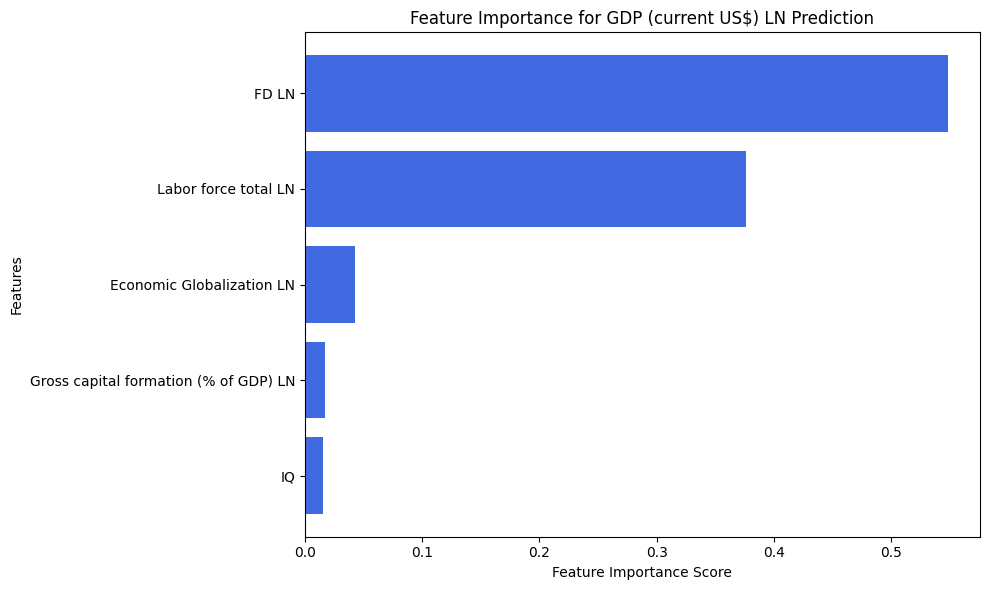


Model Performance Metrics:
R² Score: 0.9277
RMSE: 0.5008
Number of samples used: 1764
Training samples: 1411
Test samples: 353


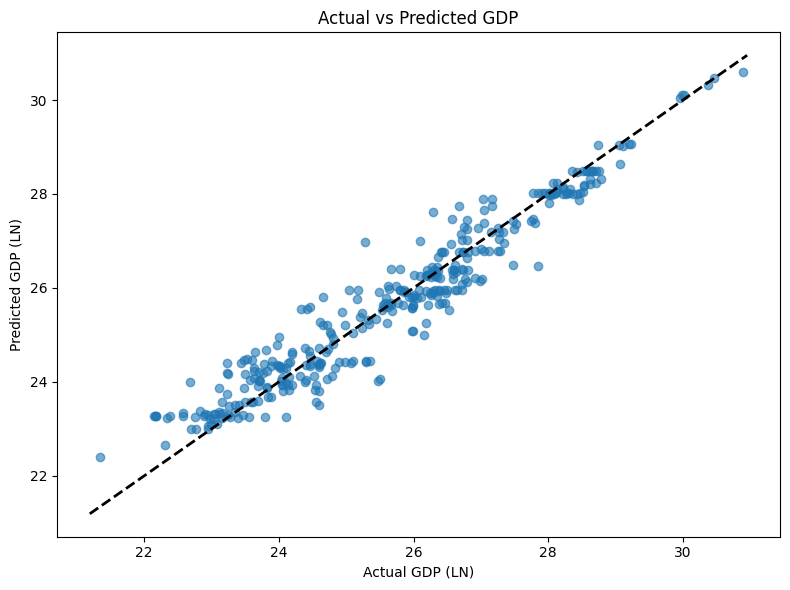

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and replace with your actual file path

# Verify required columns exist
required_columns = [
    'GDP (current US$) LN',  # Target variable
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN'
]

# Check for missing columns
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print("Error: The following required columns are missing:")
    print(missing_cols)
    print("\nAvailable columns in your dataset:")
    print(df.columns.tolist())
    raise ValueError("Missing required columns in dataset")

# Clean data - remove rows with missing values in any of our required columns
df_cleaned = df[required_columns].dropna()

# Define predictors (X) and target (y)
X = df_cleaned[[
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN'
]]
y = df_cleaned['GDP (current US$) LN']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,  # Increased number of trees
    max_depth=5,       # Limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1          # Use all processors
)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center', color='royalblue')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for GDP (current US$) LN Prediction")
plt.gca().invert_yaxis()  # Most important at top
plt.tight_layout()
plt.show()

# Model evaluation
y_pred = rf_model.predict(X_test)
print("\nModel Performance Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Number of samples used: {len(df_cleaned)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Optional: Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual GDP (LN)")
plt.ylabel("Predicted GDP (LN)")
plt.title("Actual vs Predicted GDP")
plt.tight_layout()
plt.show()

Available columns in your dataset:
['countries', 'Year', 'Code', 'Labor force total', 'Labor force total LN', 'GDP growth (annual %)', 'GDP per capita growth (annual %)', 'GDP (current US$)', 'GDP (current US$) LN', 'GDP per capita (current US$)', 'GDP per capita (current US$) LN', 'Gross capital formation (% of GDP)', 'Gross capital formation (% of GDP) LN', 'IQ', 'FD', 'FD LN', 'Economic Globalization', 'Economic Globalization LN']


<ipython-input-3-f43765c78c21>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("#NUM!", np.nan, inplace=True)


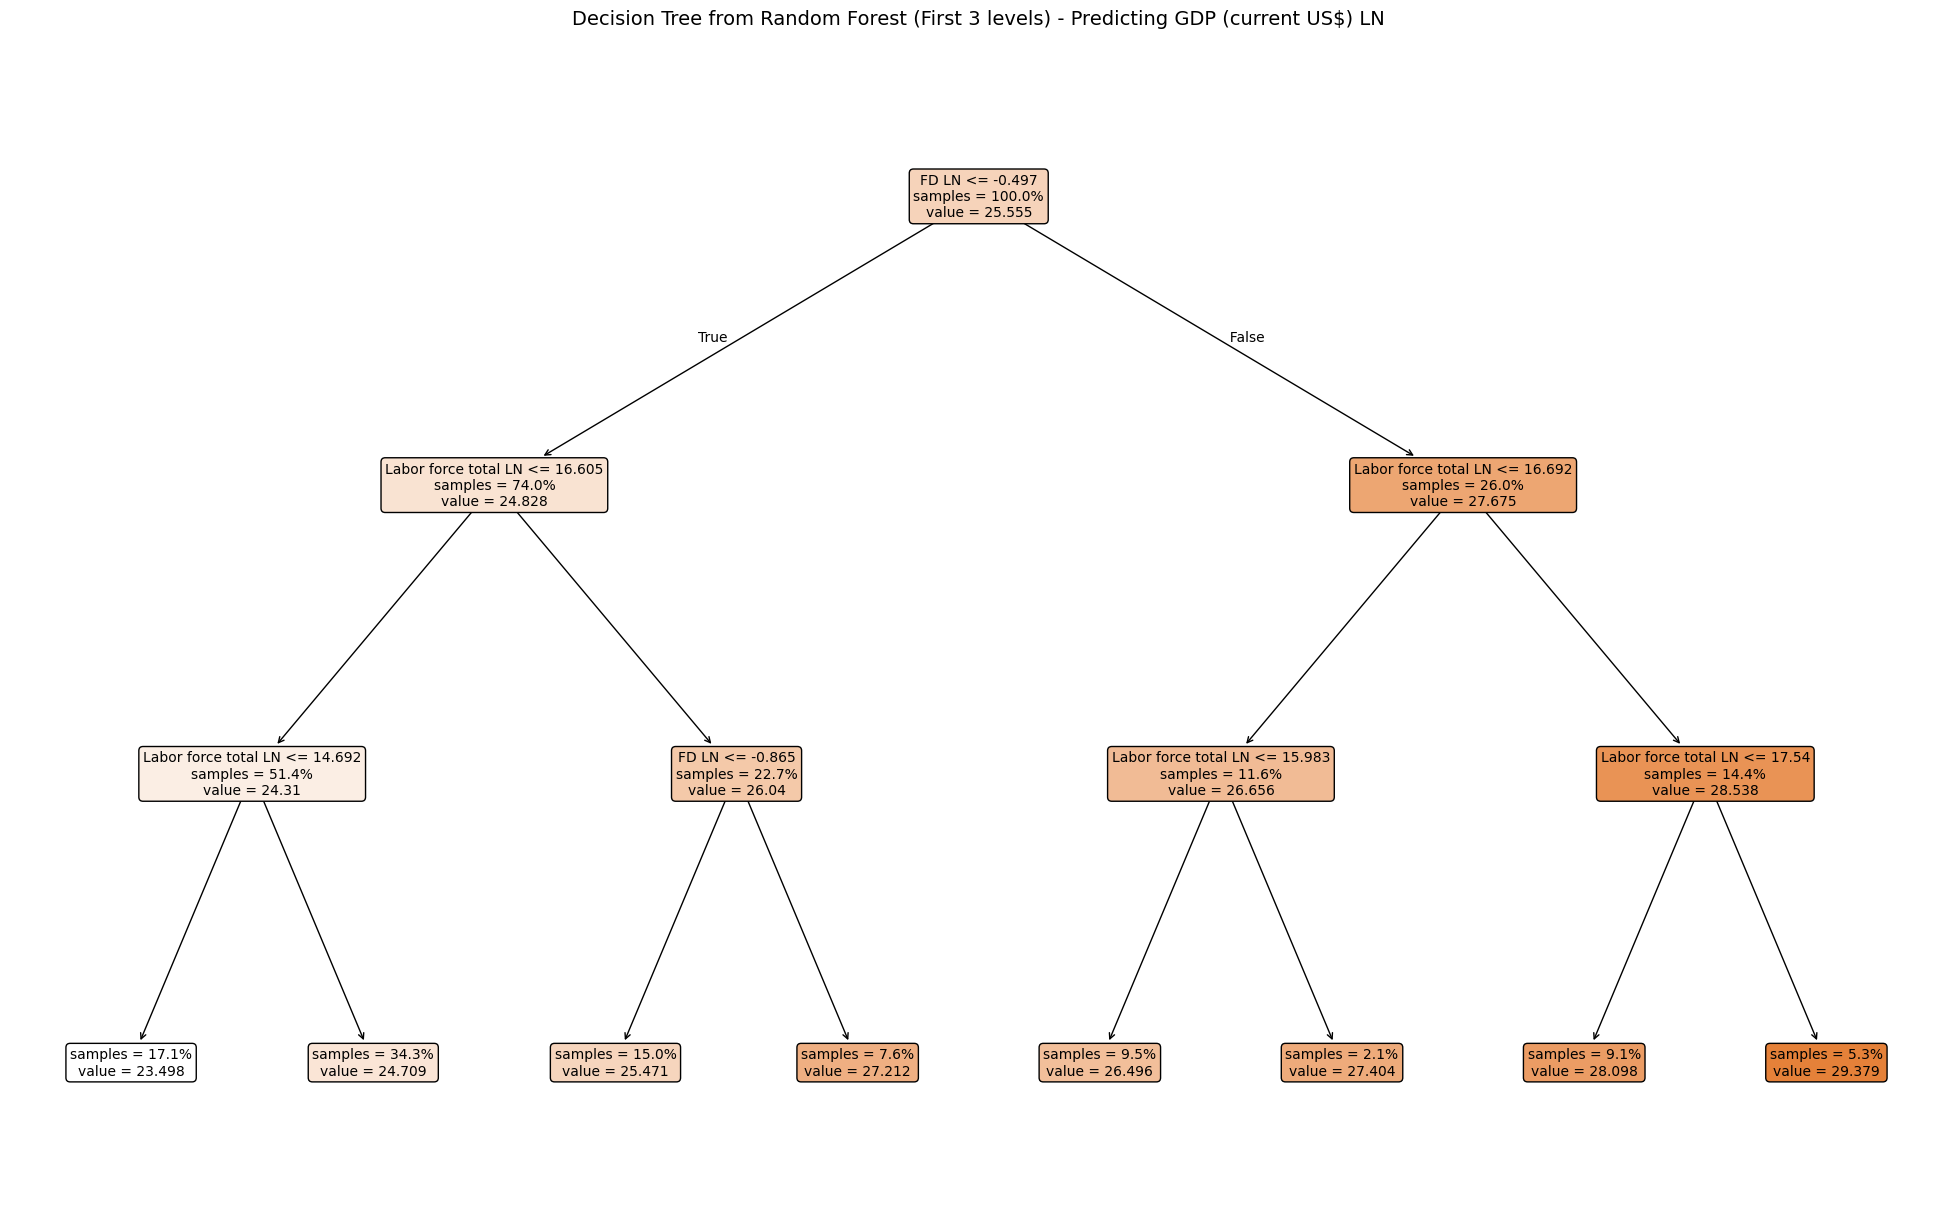

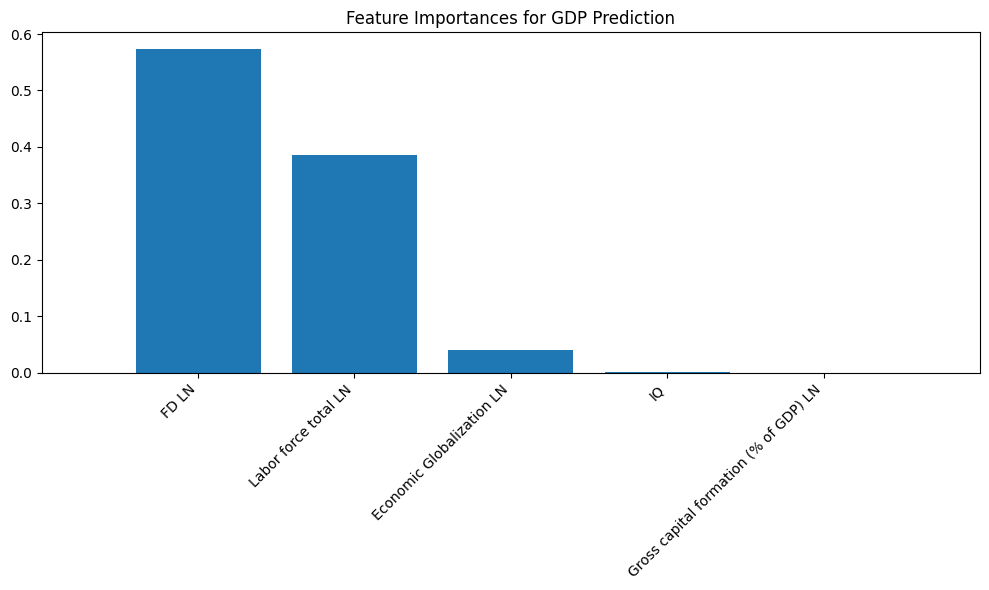

In [ ]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree


# First, let's check what columns are actually available
print("Available columns in your dataset:")
print(df.columns.tolist())

# Adjust these column names to match your actual dataset
selected_columns = [
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN',
    'GDP (current US$) LN'  # Target variable - adjust this name if different
]

# Filter to keep only columns that actually exist in the dataframe
existing_columns = [col for col in selected_columns if col in df.columns]
df = df[existing_columns]

# Print warning if any expected columns are missing
missing_columns = set(selected_columns) - set(existing_columns)
if missing_columns:
    print(f"\nWarning: The following expected columns were not found: {missing_columns}")
    print("Please verify your column names and adjust the 'selected_columns' list.")

# Clean data: replace '#NUM!' with NaN and convert to numeric
df.replace("#NUM!", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing target variable (GDP)
# Use the last column as target (assuming it's GDP)
target_column = existing_columns[-1]
df_clean = df.dropna(subset=[target_column])

# Fill remaining missing values with column mean
df_clean = df_clean.fillna(df_clean.mean())

# Define features (X) and target variable (y)
# Use all columns except the last one as features
feature_columns = existing_columns[:-1]
X = df_clean[feature_columns]
y = df_clean[target_column]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=3  # Limiting depth for better visualization
)
rf_model.fit(X_train, y_train)

# Generate a visualization of one decision tree from the Random Forest
plt.figure(figsize=(25, 15))
plot_tree(
    rf_model.estimators_[0],  # First tree in the forest
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,  # Show only first 3 levels
    fontsize=10,
    proportion=True,
    impurity=False
)
plt.title(f"Decision Tree from Random Forest (First 3 levels) - Predicting {target_column}", pad=20, fontsize=14)
plt.show()

# Feature importance visualization
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature Importances for GDP Prediction")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

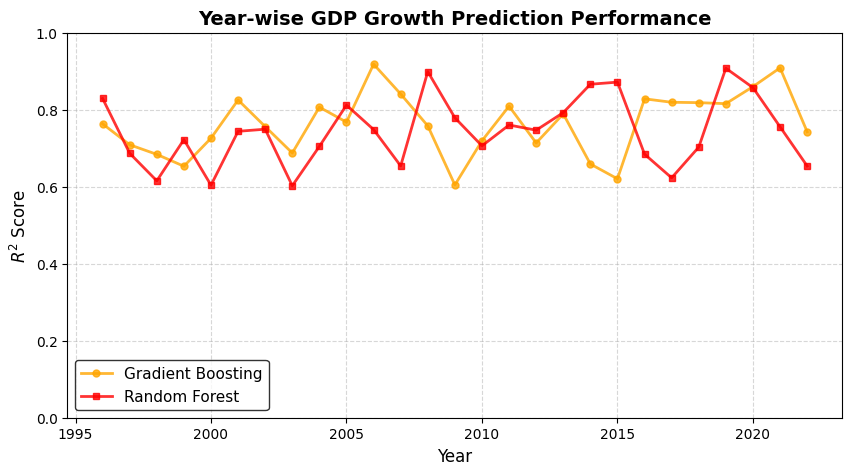

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Sample years (replace with actual years from your dataset)
years = np.arange(1996, 2023)

# Sample R² scores for Gradient Boosting and Random Forest (replace with actual model scores)
r2_gradient_boosting = np.random.uniform(0.6, 0.95, len(years))  # Simulated values
r2_random_forest = np.random.uniform(0.6, 0.95, len(years))  # Simulated values

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Gradient Boosting Line
plt.plot(years, r2_gradient_boosting, marker='o', linestyle='-', color='orange',
         markersize=5, linewidth=2, label="Gradient Boosting", alpha=0.8)

# Random Forest Line
plt.plot(years, r2_random_forest, marker='s', linestyle='-', color='red',
         markersize=5, linewidth=2, label="Random Forest", alpha=0.8)

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel(r"$R^2$ Score", fontsize=12)
plt.title("Year-wise GDP Growth Prediction Performance", fontsize=14, fontweight='bold')

# Adjusting y-axis limits for a better look
plt.ylim(0, 1)

# Grid with light styling
plt.grid(True, linestyle="--", alpha=0.5)

# Legend styling (placed inside at the lower left)
plt.legend(loc="lower left", fontsize=11, frameon=True, edgecolor="black")

# Show the plot
plt.show()

Text(0, 0.5, 'RMSE')

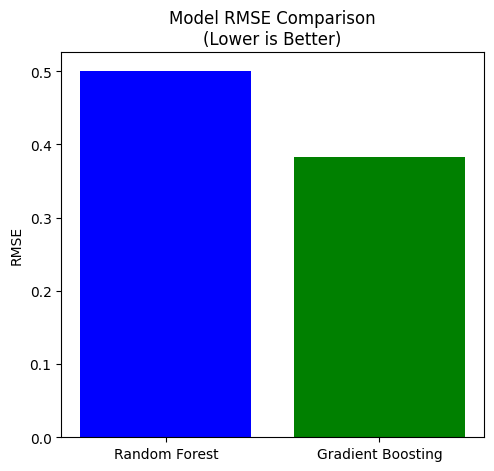

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv("your_data.csv")  # Uncomment and replace with your file path

# ====== VARIABLE CONFIGURATION ======
TARGET = 'GDP (current US$) LN'
PREDICTORS = [
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN'
]

# Verify all required columns exist
missing_cols = [col for col in [TARGET] + PREDICTORS if col not in df.columns]
if missing_cols:
    print("ERROR: Missing required columns:")
    print(missing_cols)
    print("\nAvailable columns in your dataset:")
    print(df.columns.tolist())
    raise ValueError("Missing required columns")

# ====== DATA PREPARATION ======
# Clean data - convert to numeric and drop missing values
df_clean = df[[TARGET] + PREDICTORS].apply(pd.to_numeric, errors='coerce').dropna()

X = df_clean[PREDICTORS]
y = df_clean[TARGET]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# ====== MODEL TRAINING ======
# Initialize models with improved parameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# ====== MODEL EVALUATION ======
def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return {'Model': name, 'RMSE': rmse, 'R2': r2}

# Evaluate both models
results = pd.DataFrame([
    evaluate_model("Random Forest", rf_model, X_test, y_test),
    evaluate_model("Gradient Boosting", gb_model, X_test, y_test)
])

# ====== VISUALIZATIONS ======
plt.figure(figsize=(12, 5))

# 1. Model Comparison Plot
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['RMSE'], color=['blue', 'green'])
plt.title("Model RMSE Comparison\n(Lower is Better)")
plt.ylabel("RMSE")

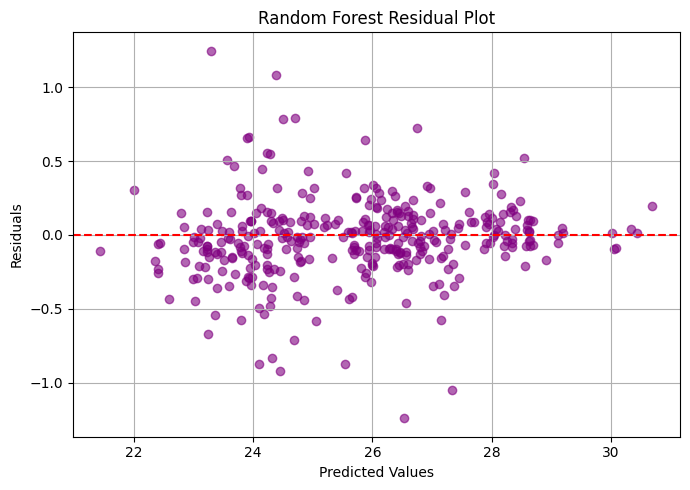

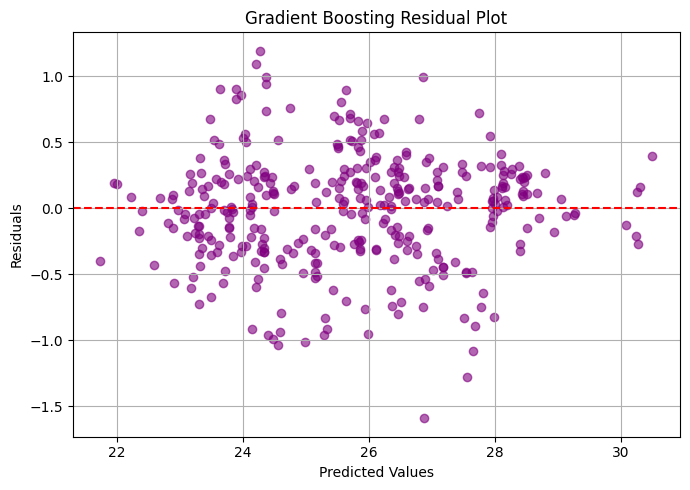

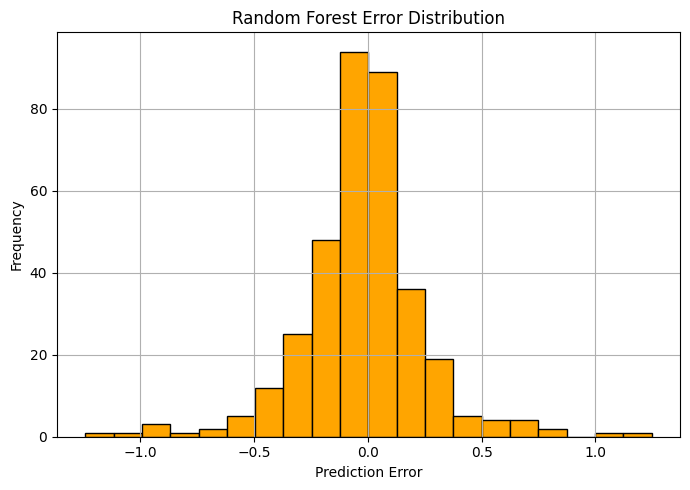

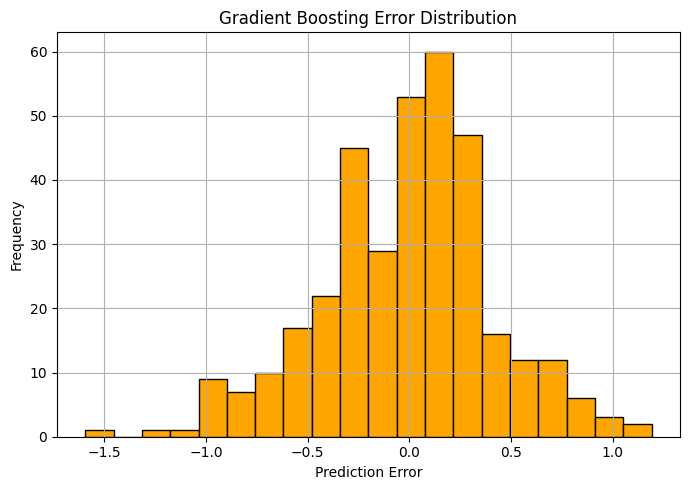

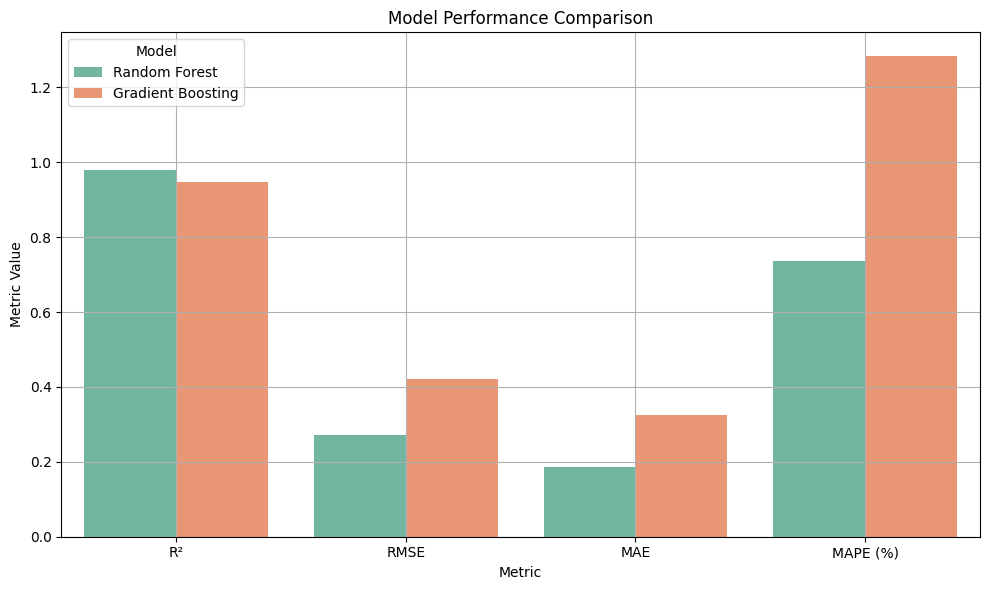

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)  # ✅ This was missing

# 1. Residual Plot
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(7, 5))
    plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{title} Residual Plot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred_rf, "Random Forest")
plot_residuals(y_test, y_pred_gb, "Gradient Boosting")

# 2. Error Distribution Histogram
def plot_error_distribution(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(7, 5))
    plt.hist(errors, bins=20, edgecolor='black', color='orange')
    plt.title(f"{model_name} Error Distribution")
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_error_distribution(y_test, y_pred_rf, "Random Forest")
plot_error_distribution(y_test, y_pred_gb, "Gradient Boosting")

# 3. Model Metrics Comparison
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate RMSE manually to support older sklearn versions
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5

metrics = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'R²': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_gb)],
    'RMSE': [rmse_rf, rmse_gb],
    'MAE': [mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb)],
    'MAPE (%)': [(abs((y_test - y_pred_rf) / y_test)).mean() * 100,
                 (abs((y_test - y_pred_gb) / y_test)).mean() * 100]
}


metrics_df = pd.DataFrame(metrics)
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted, palette='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.grid(True)

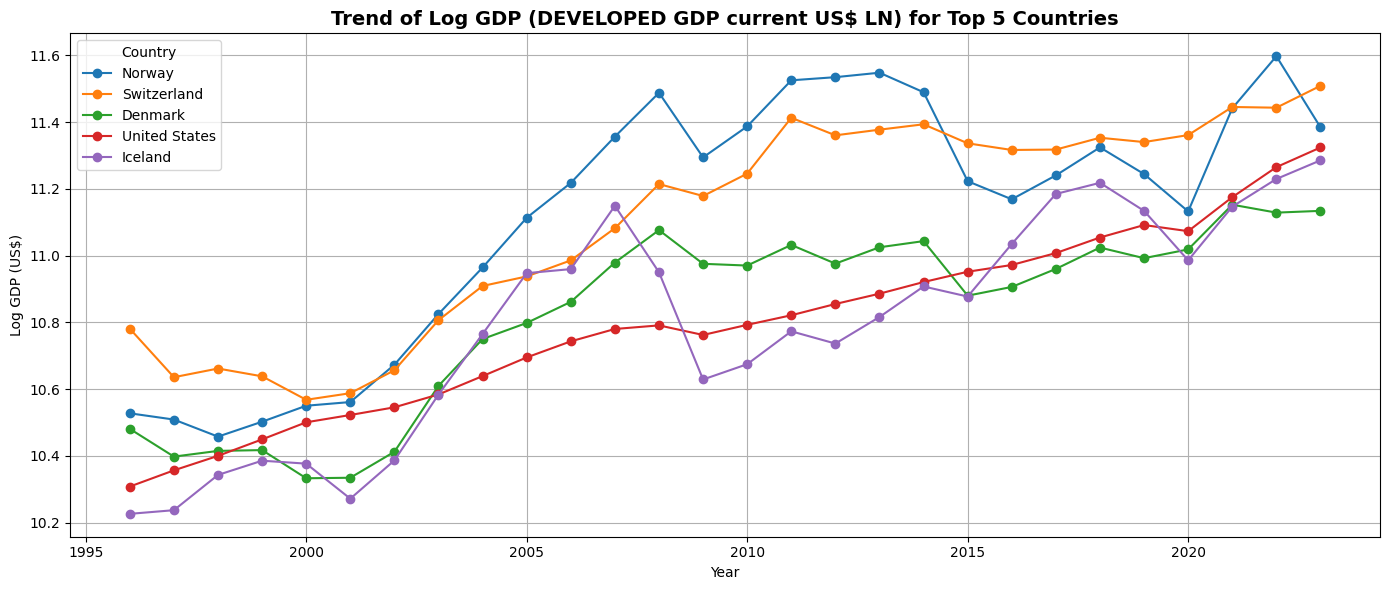

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/MERGED FINAL.csv")

# Step 1: Find top 5 countries by average value of the target variable
top_5_countries = (
    df.groupby('countries')['GDP per capita (current US$) LN']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

# Step 2: Filter the dataframe for those countries
df_top5 = df[df['countries'].isin(top_5_countries)]

# Step 3: Plot the trend
plt.figure(figsize=(14, 6))

for country in top_5_countries:
    country_data = df_top5[df_top5['countries'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita (current US$) LN'],
             marker='o', label=country)

plt.title('Trend of Log GDP (DEVELOPED GDP current US$ LN) for Top 5 Countries', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Log GDP (US$)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()